# - Autor: 
### Borja Delgado González
# - Objetivo: 
### Limpieza y visualización de los datos recogidos en un archivo .csv a partir del código del repositorio "Webscraping_de_videojuegos"
---

1. Importamos las librerías a usar en este proyecto

In [2]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Cargamos el archivo .csv en forma de DataFrame y echamos un vistazo previo.

In [36]:
df = pd.read_csv('ventas_vj_completo.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,videojuego,plataforma,genero,editor,desarrollador,ventas_na,ventas_eu,ventas_jp,ventas_otras,ventas_tot,fecha_salida
0,0,0,Tetris,Series,Puzzle,Nintendo,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,1989.0
1,1,1,Pokemon,Series,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,1998.0
2,2,2,Call of Duty,Series,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,2003.0
3,3,3,Super Mario,Series,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,1983.0
4,4,4,Grand Theft Auto,Series,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,1998.0


3. Eliminamos las dos primeras columnas y luego obtenemos la información del DataFrame para ver a qué nos enfrentamos.

In [37]:
df = df.drop(columns=df.columns[0:2], axis=1)

df.head()

,videojuego,plataforma,genero,editor,desarrollador,ventas_na,ventas_eu,ventas_jp,ventas_otras,ventas_tot,fecha_salida
0,Tetris,Series,Puzzle,Nintendo,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,1989.0
1,Pokemon,Series,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,1998.0
2,Call of Duty,Series,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,2003.0
3,Super Mario,Series,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,1983.0
4,Grand Theft Auto,Series,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,1998.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62436 entries, 0 to 62435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videojuego     62436 non-null  object 
 1   plataforma     62436 non-null  object 
 2   genero         62436 non-null  object 
 3   editor         62436 non-null  object 
 4   desarrollador  62436 non-null  object 
 5   ventas_na      13659 non-null  float64
 6   ventas_eu      14023 non-null  float64
 7   ventas_jp      7675 non-null   float64
 8   ventas_otras   16368 non-null  float64
 9   ventas_tot     20305 non-null  float64
 10  fecha_salida   56784 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.2+ MB


Podemos ver que hay muchos "NA" en las columnas de ventas, fruto de que en la fuente no se disponía de los datos. Si eliminamos los "NA" de ventas o los sustituimos por 0, el análisis estadístico sería poco representativo al perder casi 55000 filas de datos, o sesgado al haber demasiados valores como 0.
Por ello, nos centraremos en las variables "fecha_salida" y "genero" para realizar algunas visualizaciones.

---

4. Creamos algunas variables que necesitaremos para la limpieza y visualizaciones posteriores.

In [39]:
#Variables

generos = {'Action' : 'Acción',
        'Action-Adventure' : 'Acción-Aventura',
        'Adventure' : 'Aventura',
        'Board Game' : 'Juego de mesa',
        'Education' : 'Educación',
        'Fighting' : 'Lucha',
        'Music' : 'Música',
        'Party' : 'Fiesta',
        'Platform' : 'Plataformas',
        'Racing' : 'Carreras',
        'Role-Playing' : 'RPG',
        'Sandbox' : 'Mundo abierto',
        'Simulation' : 'Simulación',
        'Sports' : 'Deportes',
        'Strategy' : 'Estrategia',
        'Visual Novel' : 'Novela Visual'}

ventas = ['ventas_na','ventas_eu','ventas_jp', 'ventas_otras', 'ventas_tot']

etiquetas = ['Acción', 'Acción-Aventura', 'Aventura', 'Carreras', 'Deportes', 'Educación', 'Estrategia', 'Fiesta', 'Juego de mesa',
            'Lucha', 'MMO', 'Misc', 'Mundo abierto', 'Música', 'Novela Visual', 'Plataformas', 'Puzzle', 'RPG', 'Shooter', 'Simulación']

5. Comenzamos la limpieza del dataset.

Eliminamos las filas que tengan "Series" y "All" como plataforma porque agrupan varios juegos. También nos deshacemos de las filas sin fecha de salida.
Traducimos los géneros al español.

In [40]:
df = df.loc[df['plataforma'] != 'Series']
df = df.loc[df['plataforma'] != 'All']

df.dropna(subset = ['fecha_salida'], axis = 0, inplace=True)

df[ventas] = df[ventas].replace(np.nan,0)
df['genero'] = df['genero'].replace(generos)

suma_ventas = df['ventas_na'] + df['ventas_eu'] + df['ventas_jp'] + df['ventas_otras']
df['ventas_suma'] = suma_ventas

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55303 entries, 26 to 62435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videojuego     55303 non-null  object 
 1   plataforma     55303 non-null  object 
 2   genero         55303 non-null  object 
 3   editor         55303 non-null  object 
 4   desarrollador  55303 non-null  object 
 5   ventas_na      55303 non-null  float64
 6   ventas_eu      55303 non-null  float64
 7   ventas_jp      55303 non-null  float64
 8   ventas_otras   55303 non-null  float64
 9   ventas_tot     55303 non-null  float64
 10  fecha_salida   55303 non-null  float64
 11  ventas_suma    55303 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.5+ MB


Comprobamos que el rango de fechas sea correcto...

In [41]:
print(df['fecha_salida'].min(), '-', df['fecha_salida'].max())

1980.0 - 2079.0


Parece que el rango no es correcto. Comprobamos cuáles son los valores que son erróneos y por lo tanto, debemos cambiar.

In [46]:
df['fecha_salida'].value_counts()

2009.0    4303
2010.0    3524
2011.0    3330
2008.0    2877
2014.0    2839
2007.0    2475
2006.0    2040
2005.0    1768
2013.0    1693
2002.0    1688
2003.0    1683
2015.0    1632
2004.0    1555
2012.0    1528
2000.0    1516
2017.0    1496
2018.0    1475
2001.0    1445
2020.0    1415
2016.0    1294
2019.0    1245
1999.0    1244
1996.0    1188
1994.0    1136
1995.0    1124
1998.0    1062
1993.0    1005
1997.0     997
1992.0     910
1991.0     760
1990.0     646
1989.0     406
2021.0     365
1983.0     289
1988.0     275
1987.0     250
1982.0     203
1986.0     135
1985.0      92
2022.0      90
1984.0      89
2070.0      82
2078.0      45
1981.0      38
1980.0      31
2077.0      11
2079.0       6
2075.0       1
2073.0       1
2023.0       1
Name: fecha_salida, dtype: int64

In [47]:
fechas = {2070 : 1970,
        2073 : 1973,
        2075 : 1975,
        2077 : 1977,
        2078 : 1978,
        2079 : 1979}

df['fecha_salida'] = df['fecha_salida'].replace(fechas).astype(int)

print(df['fecha_salida'].min(), '-', df['fecha_salida'].max())


1970 - 2023


6. Algunas visualizaciones de datos

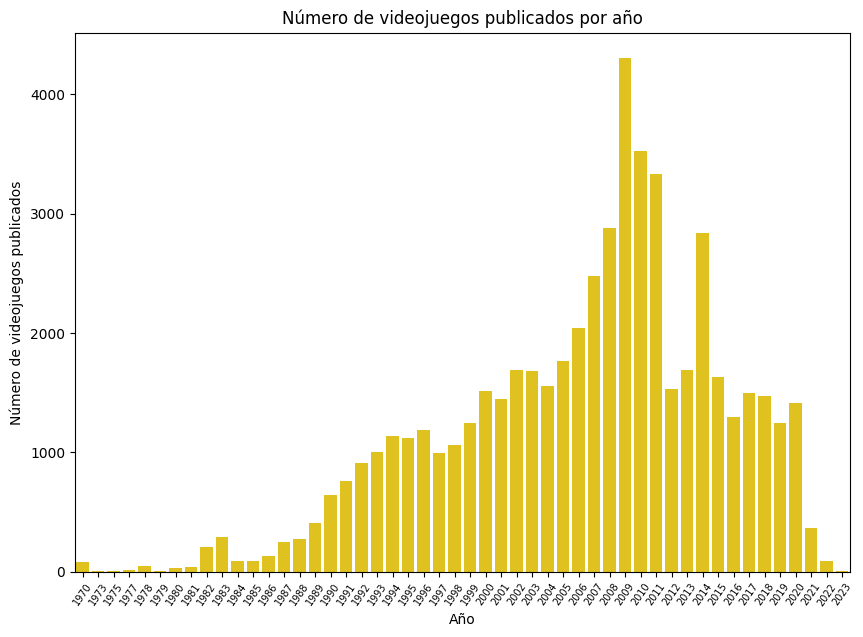

In [48]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='fecha_salida',data = df, color = 'gold')
plt.xticks(rotation = 55, fontsize = 7)
plt.title('Número de videojuegos publicados por año')
plt.xlabel('Año')
plt.ylabel('Número de videojuegos publicados');

El DataFrame generado a continuación muestra qué tipo de juego fue el más publicado por año. Vemos que han prevalecido los videojuegos de acción, aunque en los últimos años el tipo más publicado es el RPG.

In [49]:
moda_genero = pd.DataFrame(df.groupby(['fecha_salida'])['genero'].agg(pd.Series.mode))

moda_genero

,genero
fecha_salida,
1970,RPG
1973,Simulación
1975,Simulación
1977,Acción
1978,Acción
1979,"[Acción, Aventura, Deportes, Estrategia, RPG, ..."
1980,Deportes
1981,"[Acción, Shooter]"
1982,Acción


In [50]:
suma_genero = pd.DataFrame(df.groupby(['genero'])['genero'].agg(pd.Series.count))
suma_genero = suma_genero.rename(columns = {'genero':'conteo'})
suma_genero['genero'] = etiquetas
suma_genero['porcentaje'] = (suma_genero['conteo']/suma_genero['conteo'].sum())*100

suma_genero

,conteo,genero,porcentaje
genero,,,
Acción,7349,Acción,13.288610
Acción-Aventura,862,Acción-Aventura,1.558686
Aventura,5254,Aventura,9.500389
Carreras,3030,Carreras,5.478907
Deportes,5234,Deportes,9.464224
Educación,18,Educación,0.032548
Estrategia,3222,Estrategia,5.826085
Fiesta,90,Fiesta,0.162740
Juego de mesa,17,Juego de mesa,0.030740


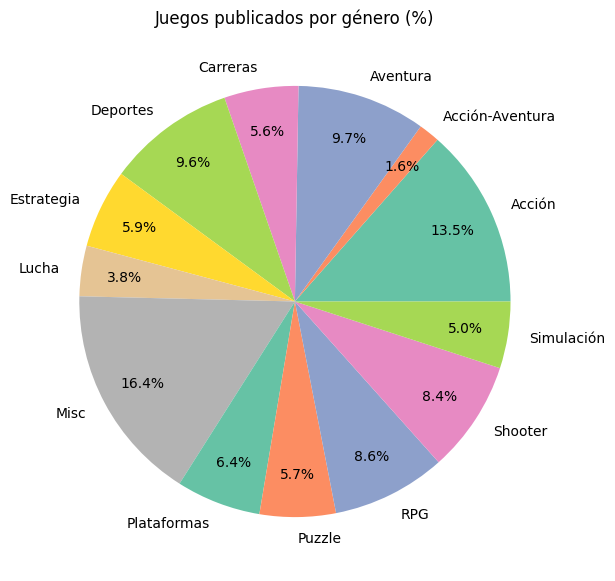

In [51]:
umbral = 1
resto_generos = suma_genero.loc[suma_genero['porcentaje'] < umbral].sum(axis=0)
resto_generos.loc['genero'] = 'resto de generos'
suma_genero = suma_genero[suma_genero['porcentaje'] >= umbral]

fig2 = plt.figure(figsize=(10,7))
colores = sns.color_palette('Set2')
plt.pie(suma_genero['conteo'], labels=suma_genero['genero'], colors = colores, autopct='%0.1f%%', pctdistance=0.8)
plt.title('Juegos publicados por género (%)');

El género "Misc" agrupa muchos juegos que pueden pertenecer a varios géneros, por lo que vamos a eliminarlo de la visualización para ver cómo se reparten el resto de géneros.

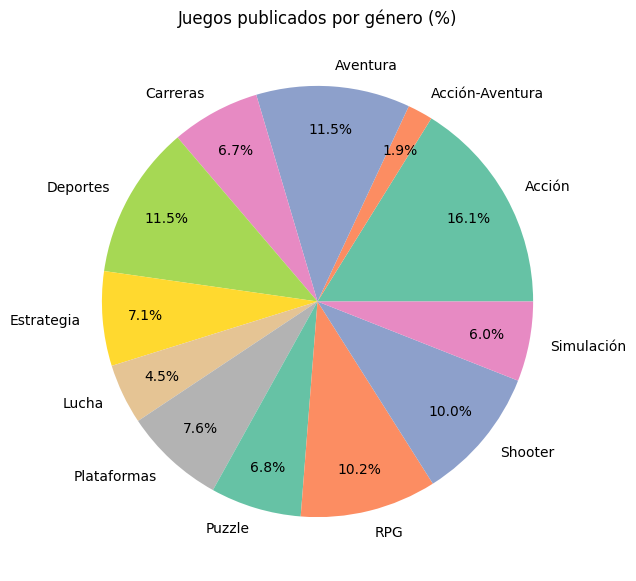

In [52]:
umbral = 1
suma_genero = suma_genero.drop('Misc')
resto_generos = suma_genero.loc[suma_genero['porcentaje'] < umbral].sum(axis=0)
resto_generos.loc['genero'] = 'resto de generos'
suma_genero = suma_genero[suma_genero['porcentaje'] >= umbral]

fig2 = plt.figure(figsize=(10,7))
colores = sns.color_palette('Set2')
plt.pie(suma_genero['conteo'], labels=suma_genero['genero'], colors = colores, autopct='%0.1f%%', pctdistance=0.8)
plt.title('Juegos publicados por género (%)');